## Example Notebook 

### Requirements

# Imports

make sure to install all required packages. dependencies are listed in the dockerfile above. If necessary, install packages within the environment


In [9]:
%load_ext autoreload
%autoreload 

import datajoint as dj
dj.config['enable_python_native_blobs'] = True


dj.config['database.user']= 'kanderer'
dj.config['database.password']= 'enamel-vendetta-deodorant'


schema_name = 'nnfabrik_monkey_saliency'

schema = dj.schema(schema_name, locals())
dj.config['nnfabrik.schema_name'] = schema_name


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import torch

import nnfabrik
from nnfabrik import builder


import numpy as np
import pickle
import os

from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

import nnvision

from nnfabrik.main import *

# NNfabrik intro: Using the builder to build the dataloader objects, models, trainer

In [11]:
# here's where the data is on the server:
os.listdir('/data')

['image_classification', 'monkey', 'mouse', 'fetched_from_attach']

In [19]:
#### loading monkey data

basepath = '/data/monkey/toliaslab/CSRF19_V4'
neuronal_data_path = os.path.join(basepath, 'neuronal_data/')
neuronal_data_files = [neuronal_data_path + f for f in listdir(neuronal_data_path) if isfile(join(neuronal_data_path, f))]
image_cache_path = os.path.join(basepath, 'images')

saliency_cache_path = os.path.join(basepath, 'images_saliency')
print(saliency_cache_path)

/data/monkey/toliaslab/CSRF19_V4/images_saliency


In [13]:
#print(image_cache_path)
print(listdir(neuronal_data_path))

['CSRF19_V4_3646657276979.pickle', '.ipynb_checkpoints', 'CSRF19_V4_3647617982355.pickle', 'CSRF19_V4_3650037309346.pickle', 'CSRF19_V4_3653924870701.pickle', 'CSRF19_V4_3646747773987.pickle', 'CSRF19_V4_3653578665399.pickle', 'CSRF19_V4_3648051669051.pickle', 'CSRF19_V4_3654009687031.pickle', 'CSRF19_V4_3653061170515.pickle', 'CSRF19_V4_3649689088057.pickle', 'CSRF19_V4_3647531807425.pickle', 'CSRF19_V4_3652885366025.pickle', 'CSRF19_V4_3652197206019.pickle', 'CSRF19_V4_3646924284383.pickle', 'CSRF19_V4_3648221742562.pickle', 'CSRF19_V4_3646222772876.pickle', 'CSRF19_V4_3651417046988.pickle', 'CSRF19_V4_3647439534447.pickle', 'CSRF19_V4_3646146362280.pickle', 'CSRF19_V4_3649771255234.pickle', 'CSRF19_V4_3653226873615.pickle', 'CSRF19_V4_3646401671909.pickle', 'CSRF19_V4_3649252123347.pickle', 'CSRF19_V4_3645713184967.pickle', 'CSRF19_V4_3648644839726.pickle', 'CSRF19_V4_3653320713405.pickle', 'CSRF19_V4_3649169411059.pickle', 'CSRF19_V4_3654087847388.pickle', 'CSRF19_V4_3648475457626.

In [20]:
# Specifying the dataset function: its defined in nnvision/datasets, and has to present in the __init__.py there.
dataset_fn = 'nnsaliency.datasets.monkey_loaders.monkey_static_loader'
dataset_config = {'dataset': 'CSRF_V4',
  'neuronal_data_files': ['/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3645713184967.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646146362280.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646222772876.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646321567215.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646401671909.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646657276979.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646747773987.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646924284383.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647439534447.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647531807425.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647617982355.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648051669051.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648221742562.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648475457626.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648644839726.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649169411059.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649252123347.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649689088057.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649771255234.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650037309346.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650459721914.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3651417046988.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652197206019.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652885366025.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653061170515.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653226873615.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653320713405.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653578665399.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653924870701.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654009687031.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654087847388.pickle'],
  'image_cache_path': '/data/monkey/toliaslab/CSRF19_V4/images/',
  'crop': [(68, 0), (126, 126)],
  'subsample': 1,
  'scale': 0.4,
  'seed': 1000,
  'batch_size': 64,
  'time_bins_sum': (3, 4, 5, 6, 7, 8, 9, 10, 11)
                 }

In [21]:
dataloaders = builder.get_data(dataset_fn, dataset_config)

In [22]:
print(dataloaders["validation"].keys())

dict_keys(['3645713184967', '3646146362280', '3646222772876', '3646321567215', '3646401671909', '3646657276979', '3646747773987', '3646924284383', '3647439534447', '3647531807425', '3647617982355', '3648051669051', '3648221742562', '3648475457626', '3648644839726', '3649169411059', '3649252123347', '3649689088057', '3649771255234', '3650037309346', '3650459721914', '3651417046988', '3652197206019', '3652885366025', '3653061170515', '3653226873615', '3653320713405', '3653578665399', '3653924870701', '3654009687031', '3654087847388'])


## Dataloaders

NNfabrik expects dataloaders to be nested dictionarys with actual PyTorch DataLoader Objects at the second Tier. The First Tier will be "train", "validation", and "test". The second Tier will be "session_key": DataLoader. So each dataset is either comprised of one or multiple sessions, with a session ID as the dictionary key to its dataloader.
Let's have a look:

In [23]:
dataloaders


{'train': {'3645713184967': <torch.utils.data.dataloader.DataLoader at 0x7f77201b6580>,
  '3646146362280': <torch.utils.data.dataloader.DataLoader at 0x7f77201c7070>,
  '3646222772876': <torch.utils.data.dataloader.DataLoader at 0x7f77201c7f40>,
  '3646321567215': <torch.utils.data.dataloader.DataLoader at 0x7f77201c8e20>,
  '3646401671909': <torch.utils.data.dataloader.DataLoader at 0x7f77201b6490>,
  '3646657276979': <torch.utils.data.dataloader.DataLoader at 0x7f77201c6130>,
  '3646747773987': <torch.utils.data.dataloader.DataLoader at 0x7f77201c6e20>,
  '3646924284383': <torch.utils.data.dataloader.DataLoader at 0x7f77201cbf70>,
  '3647439534447': <torch.utils.data.dataloader.DataLoader at 0x7f77201cde50>,
  '3647531807425': <torch.utils.data.dataloader.DataLoader at 0x7f77201d0d30>,
  '3647617982355': <torch.utils.data.dataloader.DataLoader at 0x7f77201d3bb0>,
  '3648051669051': <torch.utils.data.dataloader.DataLoader at 0x7f77201d5a90>,
  '3648221742562': <torch.utils.data.datalo

In [24]:
# so we have 5 dataloaders, for these 5 recording sessions


In [25]:
# get first data_key
first_session_ID = list((dataloaders["train"].keys()))[0]
print(first_session_ID)

3645713184967


In [26]:
# this is an actual dataloader
dataloaders["train"][first_session_ID]

In [27]:
# let's get a batch from the dataloader
a_dataloader = dataloaders["train"][first_session_ID]
batch = next(iter(a_dataloader))
batch.inputs.shape

torch.Size([64, 1, 67, 67])

In [28]:
# let's get a batch from the dataloader
a_dataloader2 = dataloaders["train"][first_session_ID]
batch2 = next(iter(a_dataloader))


In [29]:
# the batch is a namedTuple, with two fields:
type(batch)

nnvision.datasets.utility.DataPoint

In [30]:
# the inputs, which are the images
batch.inputs.shape

torch.Size([64, 1, 67, 67])

In [31]:
# and the targets, which are the neuronal responses. So we have a batch size of 128. And 32 Neurons.
batch.targets.shape

torch.Size([64, 14])

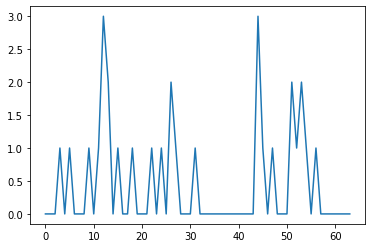

In [32]:
# Neuron 0 and it's firing across all the 128 images. It seems to like certain images a lot.
plt.plot(batch.targets[:,0])

In [33]:
best_image_index = torch.argmax(batch.targets[:,0])
best_image =batch.inputs[best_image_index]

IndexError: index 1 is out of bounds for axis 0 with size 1

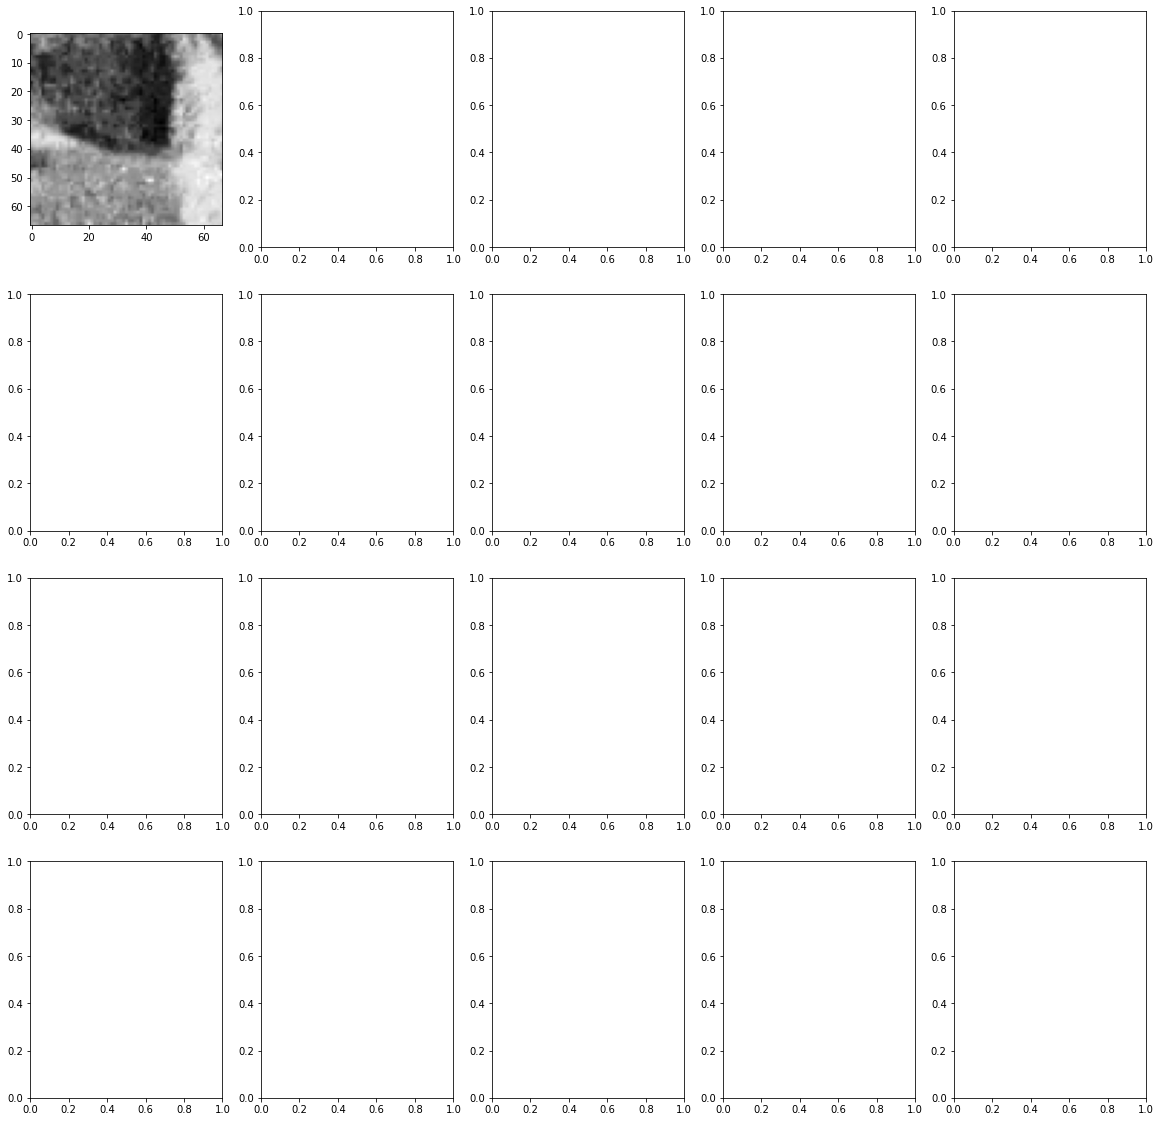

In [34]:
# the best_image is a tensor, to display it, we have to convert to numpy, or use the fancy pytorch plotting. 
#Here I'm using numpy. for plotting it needs 2 dimensions, that's what the squeeze is doing.
fig, axs = plt.subplots(4, 5, figsize=(20,20))


for i in range(0,5):
    axs[0][i].imshow(batch.inputs[i].numpy()[0,:,:].squeeze(), cmap="gray" )
    axs[1][i].imshow(batch.inputs[i].numpy()[1,:,:].squeeze())
for i in range(0, 5):
    axs[2][i].imshow(batch.inputs[i+5].numpy()[0,:,:].squeeze(), cmap="gray" )
    axs[3][i].imshow(batch.inputs[i+5].numpy()[1,:,:].squeeze())
fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# the images are cropped to only a very small window, so they dont look so meaningful here.

In [35]:
inputs, targets = next(iter(a_dataloader))

print(type(targets))

#assert torch.all(torch.eq(targets, targets2))
print("image_dimensions:", inputs.shape)
print("number of neurons of that session: ", targets.shape)
print("total training batches: ", len(a_dataloader))

<class 'torch.Tensor'>
image_dimensions: torch.Size([64, 1, 67, 67])
number of neurons of that session:  torch.Size([64, 14])
total training batches:  187


In [36]:
# here's how to get the whole dataset at once

# input image dimension
input_shape = dataloaders["train"][first_session_ID].dataset[:].inputs.shape
print(input_shape)
# total images = 16064
# dims: N x C x W x H

torch.Size([11951, 1, 67, 67])


In [37]:
# outpt dimensions: neuronal firing rates'
output_shape = dataloaders["train"][first_session_ID].dataset[:].targets.shape

print(output_shape)
# Output: 14 Neurons, with N spikes over 60 ms

torch.Size([11951, 14])


## Model Building

Models are built using the mlutils repo from sinzlab. They consist of a convolutional core (with a user-specified number of layers), and a readout (spatial transformer readout, described in Sinz et al, 2018, NeurIPS).

### Building a model

In [38]:
model_fn = 'nnvision.models.se_core_full_gauss_readout'
model_config = {'pad_input': False,
  'gauss_type': 'isotropic',
  'gamma_readout': 0.43,
  'gamma_input': 10,
  'layers': 6,
  'depth_separable': True,
  'n_se_blocks': 0,
  'stack': -1,
  'input_kern': 15,
  'hidden_kern': 9,
  'hidden_channels': 32,
  'init_mu_range': 0.1780563002765732,
  'init_sigma': 0.5851238789405838}

model = builder.get_model(model_fn, model_config, dataloaders=dataloaders,seed=1000)
print(model)

ModuleNotFoundError: No module named 'mlutils'

Above is the model description. Each session has its own readout. The Readout learns an x,y position between -1 and 1, relative to image space, and reads out from that point in feature space. THat means that the effective receptive field size of a unit in the last hidden layer will also be the receptive field size of the neuron. The x/y coordinates can be accessed like this:


In [126]:
model.core.features.layer0.conv.weight.data.shape

torch.Size([32, 2, 20, 20])

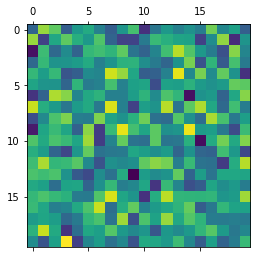

In [127]:
# here's a convolutional filter of the first layer. It's not trained yet, so it looks quite random
plt.matshow(model.core.features.layer0.conv.weight.data[0,0])

#### Show example readout positions after initialization

In [128]:
# x/y position (after random initialization, becuse the model isnt trained yet) for each neuron in that session
model.readout[first_session_ID].grid

tensor([[[[-0.1536, -0.1007]],

         [[-0.1175, -0.0740]],

         [[-0.0187,  0.1311]],

         [[-0.0306,  0.0183]],

         [[-0.0724,  0.0382]],

         [[-0.0359, -0.0578]],

         [[ 0.1375, -0.1226]],

         [[-0.1774, -0.1171]],

         [[ 0.1093,  0.1890]],

         [[ 0.1505, -0.1442]],

         [[-0.1456, -0.0402]],

         [[-0.1623, -0.1383]]]], grad_fn=<ClampBackward>)

## Building a Trainer

the trainer is taking care of the whole training process. when the trainer is built, it's a function with the configuration already initialized

In [129]:
trainer_fn = 'nnvision.training.nnvision_trainer'
trainer_config = dict(max_iter=10, 
                      lr_decay_steps=4, 
                      tolerance=0.0005, 
                      patience=5,
                      verbose=False, 
                      lr_init=0.003,
                      avg_loss=False,
                      device='cuda')

trainer = builder.get_trainer(trainer_fn, trainer_config)

## Train a model

In [132]:
# here we train the model, the validation correlation is shown after each epoch.
# it's training just for 5 epochs, so that it trains fast.

score, output, model_state = trainer(model=model, dataloaders=dataloaders, seed=1000)


Epoch 1:  27%|██▋       | 127/465 [00:03<00:09, 37.28it/s]


KeyboardInterrupt: 

In [133]:
print(score)
print(output)

0.07048882
{'validation_corr': 0.07048882}


In [134]:
## what about Test accuracy?
get_explainable_var(dataloaders=dataloaders, as_dict=False, per_neuron=True, repeat_limit=None, randomize=True)

NameError: name 'get_explainable_var' is not defined

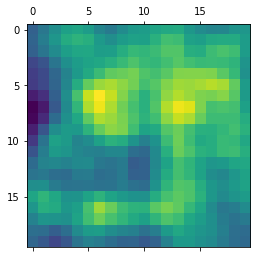

In [252]:
# after training, let's look at the convolutional kernel again:
# the model is on the GPU now, so we have to convert it back to CPU
plt.matshow(model.core.features.layer0.conv.weight.data[0,0].detach().cpu())

In [ ]:
# what a nice and smooth kernel. (well, somewhat.)

# Part Two: NNfabrik and DataJoint

Instead of using the builder to get the data/model/and trainer, we can use datajoint to manage that process for us.
There are Model, Dataset, and Trainer Tables. And each combination in those tables should in principle lead to a fully trained model.
For completeness, there is also a Seed table that stores the random seed, and a Fabrikant table, that stores the name and contact details of the creator (=Fabrikant).


### Make sure that a dj-database is connected. Recommended dj version is 0.12.4

In [ ]:
import datajoint as dj

dj.config['enable_python_native_blobs'] = True

from nnfabrik.templates.trained_model import TrainedModelBase
from nnfabrik.main import *
import os

if not 'stores' in dj.config:
    dj.config['stores'] = {}
    
dj.config['stores']['minio'] = {  # store in s3
    'protocol': 's3',
    'endpoint': os.environ.get('MINIO_ENDPOINT', 'DUMMY_ENDPOINT'),
    'bucket': 'nnfabrik',
    'location': 'dj-store',
    'access_key': os.environ.get('MINIO_ACCESS_KEY', 'FAKEKEY'),
    'secret_key': os.environ.get('MINIO_SECRET_KEY', 'FAKEKEY')
}

In [ ]:
a = Dataset.full_table_name

In [ ]:
Dataset.database

In [ ]:
# change this entry to reflect your datajoint username
Fabrikant().insert1(dict(fabrikant_name='kanderer',
                         email="k.anderer@t-online.de",
                         affiliation='sinzlab',
                         dj_username="kanderer"))

In [ ]:
Fabrikant()

In [ ]:
schema

In [ ]:
Seed().insert([{'seed':1000}])
Seed()

###  add entries for dataset, model, and trainer, with their corresponding configurations

#### Dataset

In [ ]:
# adds the dataset_function and dataset config that we defined above to the datase table
#Dataset().add_entry(dataset_fn, dataset_config, dataset_comment='CSRF_V1')
Dataset()

#### Model

In [ ]:
model_fn = 'nnvision.models.se_core_full_gauss_readout'
model_config = {'pad_input': False,
                'stack': -1,
               'depth_separable': True,
               'input_kern': 20,
               'gamma_input': 11.2,
               'gamma_readout': 0.33,
               'hidden_dilation': 1,
               'hidden_kern': 5,
               'n_se_blocks': 0,
               'hidden_channels': 32,
               'gauss_type': 'isotropic'}                
Model().add_entry(model_fn, model_config, model_comment='isotropic')
Model()

In [ ]:
trainer_fn = 'nnvision.training.nnvision_trainer'
trainer_config = dict(max_iter=5, 
                      lr_decay_steps=4, 
                      tolerance=0.0005, 
                      patience=5,
                      verbose=False, 
                      lr_init=0.0045,
                      avg_loss=False,
                      device='cuda')

#Trainer().add_entry(trainer_fn, trainer_config, trainer_comment="max_iter: 5")
Trainer()

####  The TrainedModel is a template, which can be found in nnfabrik.template.py

the trained model table is taking care of model training, and stores the model state in a part table. For further analyses of the trained model, one can either overwrite the TrainedModel definition by inheriting from the Base template class, or by attaching other tables to trained model.

In [ ]:
# creating the simples TrainedModel class
@schema
class TrainedModel(TrainedModelBase):
    table_comment = "Trained models"
    storage = "minio"
    model_table = Model
    dataset_table = Dataset
    trainer_table = Trainer
    seed_table = Seed
    user_table = Fabrikant

In [ ]:
#dj.Diagram(schema)

as primary keys, it has the hashes of all the configurations, and it stores the score, and the output (which are defined in the respective trainer)

## Lets populate

In [ ]:
TrainedModel().populate()

In [ ]:
TrainedModel()

In [ ]:
model_hash = TrainedModel().fetch1("model_hash")

In [ ]:
# now if you want to build the model again, we can use the .load_model() function of the trained model table.
# To use the load model function, the table needs to be restricted to one Entry. 
# for example: restricting with a key:
some_key = dict(model_hash=model_hash)
TrainedModel&some_key

# How to Load a Model

In [ ]:
dataloader, model = (TrainedModel & some_key).load_model()

In [ ]:
# that is the trained model, with the state dict loaded and all. lets set to eval and start using it
model.eval();

In [ ]:
model

# Parameter Extension

In [ ]:
# There's also the parameter extension, so that you can restrict with the config objects as well.

In [ ]:
from nnfabrik.utility.dj_helpers import create_param_expansion, make_definition
ModelExpanded = create_param_expansion('nnvision.models.se_core_full_gauss_readout', Model,fn_field='model_fn', config_field='model_config')
ModelParams = schema(ModelExpanded)

In [ ]:
ModelParams()

In [ ]:
ModelParams.populate()

In [ ]:
ModelParams()

In [ ]:
# for example:
Model*ModelParams&"hidden_kern=5"

In [ ]:
# Now you can just use that for building the model:
dataloaders, model =(TrainedModel & ((Model * ModelParams)&"hidden_kern=5")).load_model()